# <font color='silver'>Python Fundamentos - Groupby</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


## Groupby
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
Uma operação de agrupamento de dados envolve uma combinação de ações como: <br>
- **Dividir o dataset** em grupos com base em algum critério; <br>
- **Aplicar funções** para cada grupo independente; <br>
- **Combinar os resultados** em uma estrutura de dados. <br> 
<br>
    
Permite observar os dados a partir de diversas perspectivas.<br>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html    
    
</details>

In [2]:
# Importando pacotes
import pandas as pd
import numpy as np

In [3]:
# Coletando os dados
df = pd.read_csv('Dados/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Excluir colunas específicas
df = df.drop(['PassengerId', 'Name'], axis=1)

In [7]:
# Renomeando as colunas
df.columns = ['Sobrevivente', 'Classe', 'Sexo', 'Idade', 'Quantidade de irmãos e esposas', 'Quantidade de pais e crianças', 'Bilhete', 'Tarifa', "Cabine", 'Porto de Embarque']
df

,Sobrevivente,Classe,Sexo,Idade,Quantidade de irmãos e esposas,Quantidade de pais e crianças,Bilhete,Tarifa,Cabine,Porto de Embarque
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Analisar os dados setando a variável Sobrevivente como índice
df1 = df.groupby("Sobrevivente")

In [9]:
# Não conseguimos imprimir objetos do tipo Groupby
df1

In [10]:
# Verificando a quantidade de sobreviventes e não sobreviventes
df1["Sobrevivente"].size()

Sobrevivente
0    549
1    342
Name: Sobrevivente, dtype: int64

In [9]:
# Verificando a média das variáveis numéricas de acordo com a variável sobrevivente
df1[["Idade", "Quantidade de irmãos e esposas", "Quantidade de pais e crianças", "Tarifa"]].aggregate(["mean"])

,Idade,Quantidade de irmãos e esposas,Quantidade de pais e crianças,Tarifa
,mean,mean,mean,mean
Sobrevivente,,,,
0,30.626179,0.553734,0.329690,22.117887
1,28.343690,0.473684,0.464912,48.395408


In [10]:
# Verificando a mediana das variáveis numéricas de acordo com a variável Sobrevivente
df1[["Idade", "Quantidade de irmãos e esposas", "Quantidade de pais e crianças", "Tarifa"]].aggregate(["median"])

,Idade,Quantidade de irmãos e esposas,Quantidade de pais e crianças,Tarifa
,median,median,median,median
Sobrevivente,,,,
0,28.0,0.0,0.0,10.5
1,28.0,0.0,0.0,26.0


In [11]:
# Verificando o valor mínimo e máximo das variáveis numéricas de acordo com a variável Sobrevivente
df1[["Idade", "Quantidade de irmãos e esposas", "Quantidade de pais e crianças", "Tarifa"]].aggregate(["min", "max"])

Idade       Quantidade de irmãos e esposas      \
               min   max                            min max   
Sobrevivente                                                  
0             1.00  74.0                              0   8   
1             0.42  80.0                              0   4   

             Quantidade de pais e crianças     Tarifa            
                                       min max    min       max  
Sobrevivente                                                     
0                                        0   6    0.0  263.0000  
1                                        0   5    0.0  512.3292

In [12]:
# Verificando a soma das variáveis numéricas de acordo com a variável Sobrevivente
df1[["Idade", "Quantidade de irmãos e esposas", "Quantidade de pais e crianças", "Tarifa"]].aggregate(["sum"])

,Idade,Quantidade de irmãos e esposas,Quantidade de pais e crianças,Tarifa
,sum,sum,sum,sum
Sobrevivente,,,,
0,12985.50,304,181,12142.7199
1,8219.67,162,159,16551.2294


In [12]:
# Indexando a variável sobrevivente e a variável sexo
df2 = df.groupby(["Sobrevivente", "Sexo"])

In [13]:
# Verificando as quantidades de sobreviventes e não sobreviventes por sexo 
df2.size()

Sobrevivente  Sexo  
0             female     81
              male      468
1             female    233
              male      109
dtype: int64

In [14]:
# Reiniciando os índices do agrupamento
df2.size().reset_index()

,Sobrevivente,Sexo,0
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [15]:
# Renomeando a coluna
df2.size().reset_index().rename(columns = {0: "Quantidade"})

,Sobrevivente,Sexo,Quantidade
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Sobrevivente,Sexo'>

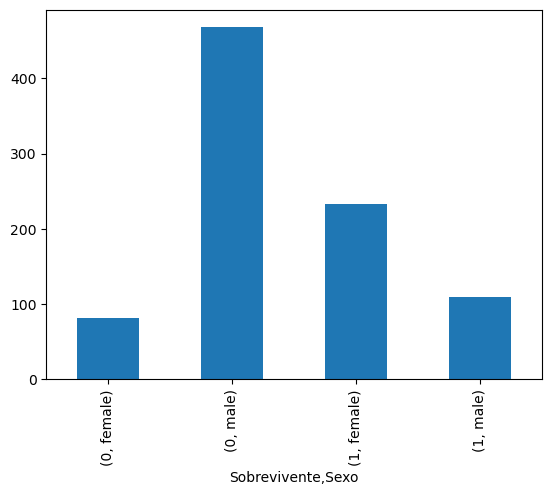

In [16]:
# Gráfico das quantidades de sobreviventes e não sobreviventes por sexo 
df2.size().plot.bar()

In [18]:
# Indexando a variável sobrevivente e a variável classe
df3 = df.groupby(["Sobrevivente", "Classe"])

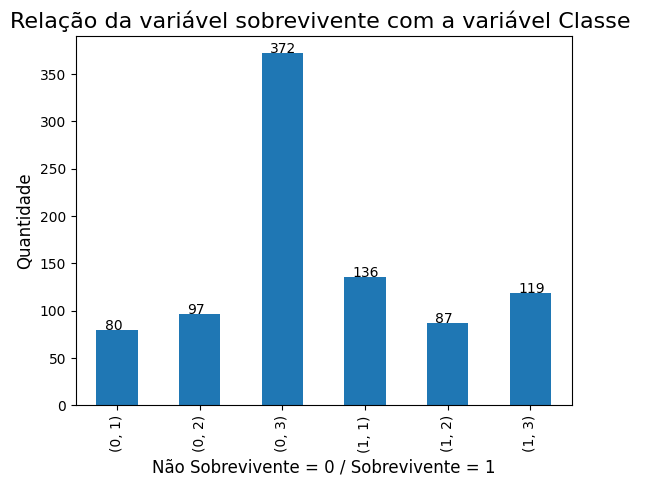

In [20]:
# Gráfico das quantidades de sobreviventes e não sobreviventes por Classe 
ax = df3.size().plot.bar()
ax.set_title("Relação da variável sobrevivente com a variável Classe ", fontsize = 16)
ax.set_xlabel("Não Sobrevivente = 0 / Sobrevivente = 1", fontsize = 12)
ax.set_ylabel("Quantidade", fontsize = 12)
for p in ax.patches:
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

In [21]:
# Indexando a variável sobrevivente, a variável Sexo e a variável Classe
df4 = df.groupby(["Sobrevivente", "Sexo", "Classe"])

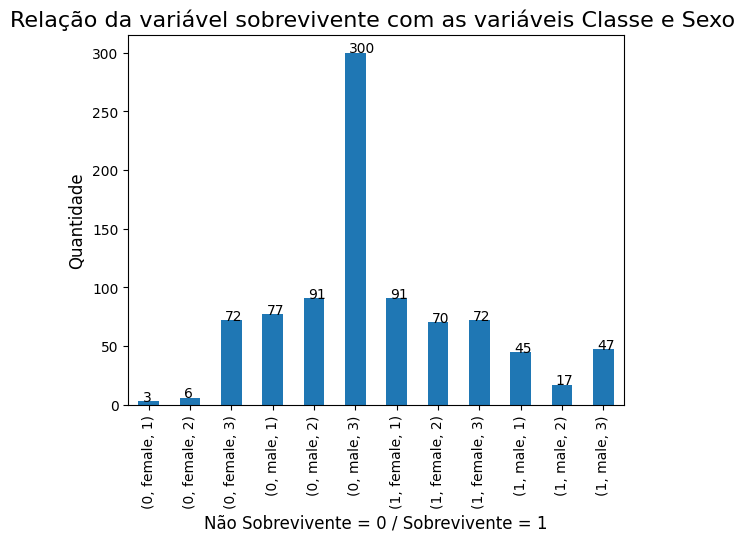

In [22]:
# Gráfico das quantidades de sobreviventes e não sobreviventes por Classe e por Sexo
ax = df4.size().plot.bar()
ax.set_title("Relação da variável sobrevivente com as variáveis Classe e Sexo ", fontsize = 16)
ax.set_xlabel("Não Sobrevivente = 0 / Sobrevivente = 1", fontsize = 12)
ax.set_ylabel("Quantidade", fontsize = 12)
for p in ax.patches:
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

In [23]:
# Indexando a variável sobrevivente e a variável Quantidade de pais e crianças
df5 = df.groupby(["Sobrevivente", "Quantidade de pais e crianças"])

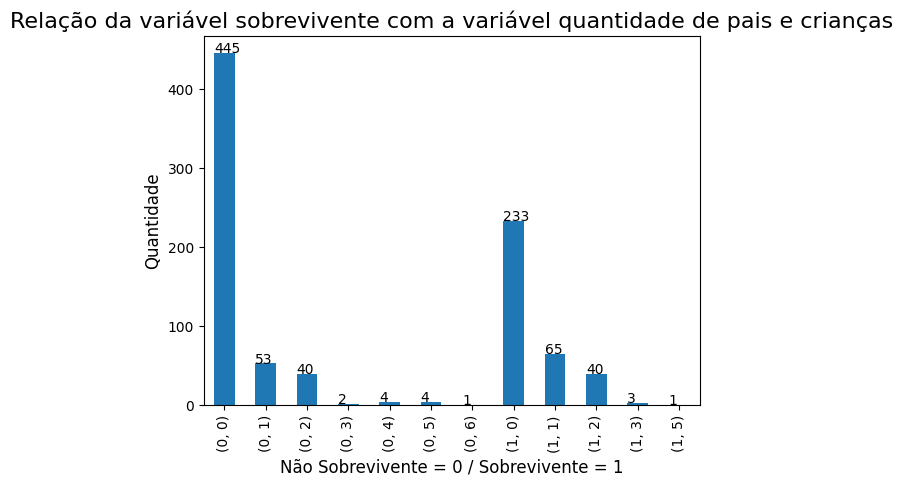

In [24]:
# Gráfico das quantidades de sobreviventes e não sobreviventes de acordo com a Quantidade de pais e crianças
ax = df5.size().plot.bar()
ax.set_title("Relação da variável sobrevivente com a variável quantidade de pais e crianças", fontsize = 16)
ax.set_xlabel("Não Sobrevivente = 0 / Sobrevivente = 1", fontsize = 12)
ax.set_ylabel("Quantidade", fontsize = 12)
for p in ax.patches:
    _x = p.get_x() + p.get_width() - 0.5
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

In [25]:
# Indexando a variável sobrevivente e a variável Porto de Embarque
df6 = df.groupby(["Sobrevivente", "Porto de Embarque"])

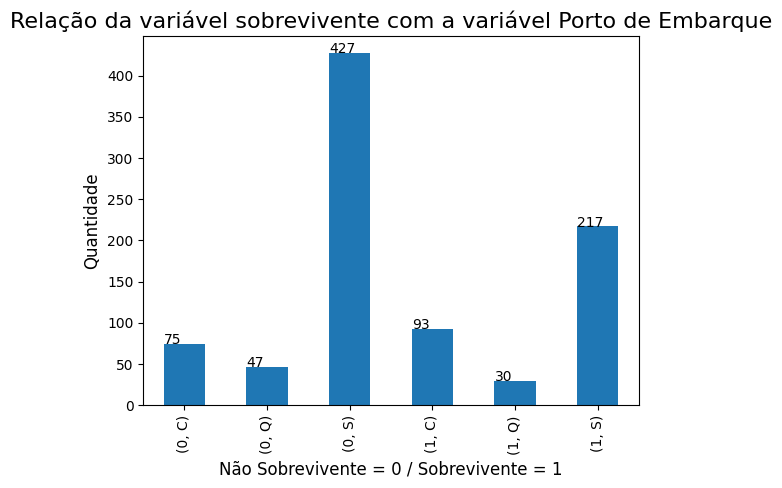

In [26]:
# Gráfico das quantidades de sobreviventes e não sobreviventes de acordo com o Porto de Embarque
ax = df6.size().plot.bar()
ax.set_title("Relação da variável sobrevivente com a variável Porto de Embarque", fontsize = 16)
ax.set_xlabel("Não Sobrevivente = 0 / Sobrevivente = 1", fontsize = 12)
ax.set_ylabel("Quantidade", fontsize = 12)
for p in ax.patches:
    _x = p.get_x() + p.get_width() - 0.5
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")